# Visualizing Decision Boundaries of Various Classification Algorithms

In [ ]:
from sklearn.datasets import make_blobs, make_moons

import matplotlib.pyplot as plt
def plot_dots(X, y):
  plt.plot(X[y==1][:,0], X[y==1][:,1], 'b.')
  plt.plot(X[y==0][:,0], X[y==0][:,1], 'r.')

import numpy as np

def plot_surface(X, y, clf):
  min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
  min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
  scale1 = (max1-min1)/1000
  scale2 = (max2-min2)/1000
  x1grid = np.arange(min1, max1, scale1)
  x2grid = np.arange(min2, max2, scale2)
  xx, yy = np.meshgrid(x1grid, x2grid)
  r1, r2 = xx.flatten(), yy.flatten()
  r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
  grid = np.hstack((r1,r2))
  yhat = clf.predict(grid)
  zz = yhat.reshape(xx.shape)
  plt.contourf(xx, yy, zz, cmap='Blues', levels=1)






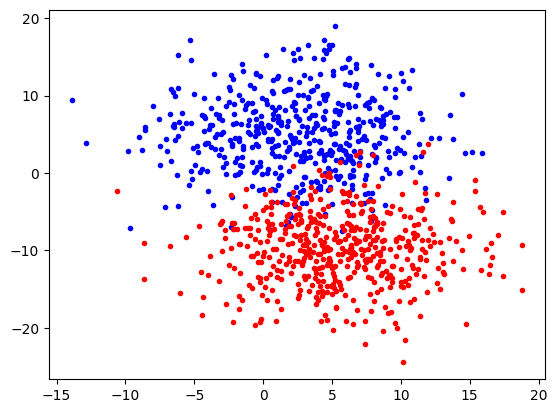

In [ ]:

Xb, yb = make_blobs(1000, centers=2, cluster_std = [5,5], random_state=10)
plot_dots(Xb, yb)

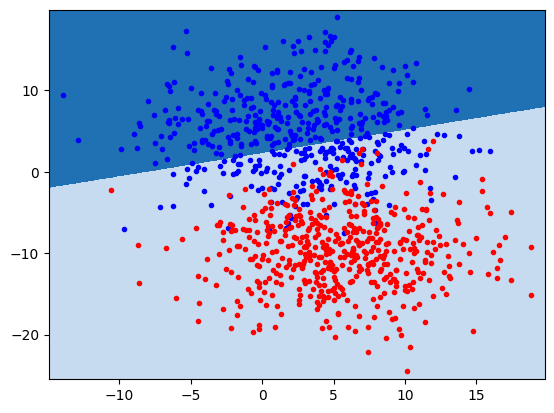

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='liblinear',
                         class_weight={0:100, 1:1})
clf.fit(Xb,yb)
plt.figure()
plot_dots(Xb,yb)
plot_surface(Xb,yb,clf)


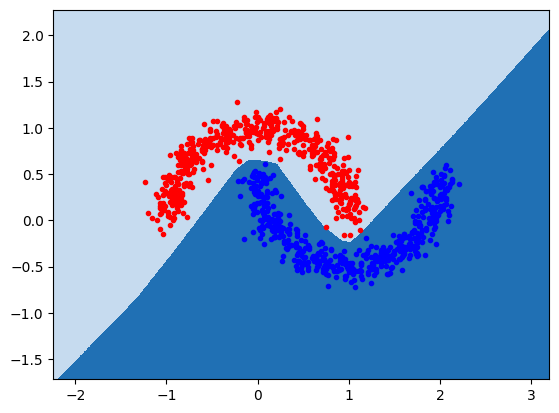

In [ ]:
from sklearn.neural_network import MLPClassifier
Xb, yb = make_moons(1000, noise=0.1)
clf = MLPClassifier(hidden_layer_sizes=(15,500))
clf.fit(Xb, yb)
plot_dots(Xb,yb)
plot_surface(Xb,yb,clf)


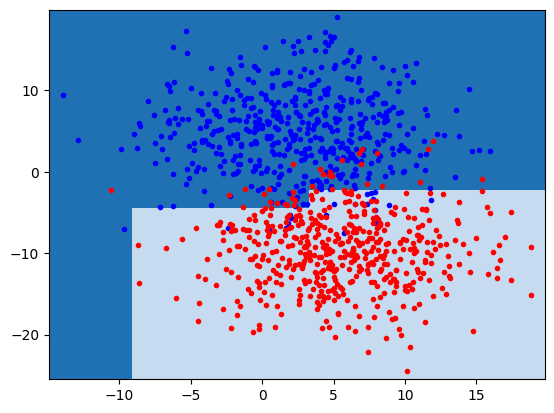

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Xb, yb = make_blobs(1000, centers=2, cluster_std = [5,5], random_state=10)

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(Xb, yb)
plot_dots(Xb,yb)
plot_surface(Xb,yb,clf)

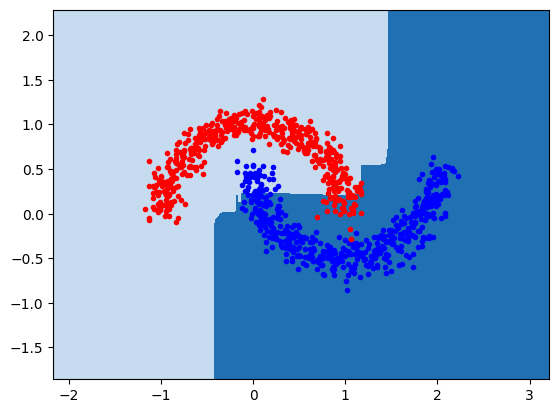

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Xb, yb = make_moons(1000, noise=0.1)

clf = RandomForestClassifier(n_estimators=1000, max_depth=3)
clf.fit(Xb, yb)
plot_dots(Xb,yb)
plot_surface(Xb,yb,clf)

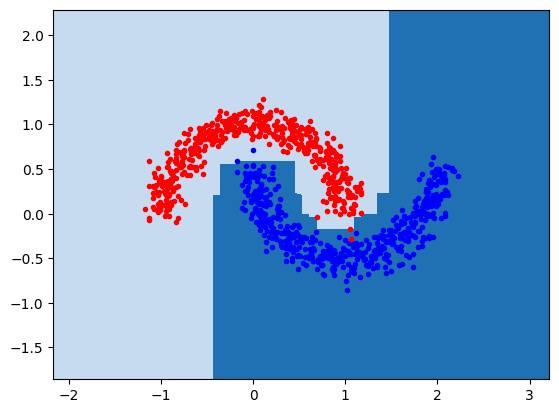

In [ ]:
from xgboost import XGBClassifier
clf = XGBClassifier()

clf.fit(Xb, yb)
plot_dots(Xb,yb)
plot_surface(Xb,yb,clf)